# Lecture 04: Data manipulation II
Goals for this lecture:

* Understand how [pipes](#Pipes) work and when to use them.
* Learn to [generate new variables](#Adding-New-Variables) using various transformations.
* Learn about [grouping data and summarizing it](#Grouped-Summaries).

As usual we will rely on the `tidyverse` and `nycflights13` packages.

In [64]:
library(tidyverse)
library(nycflights13)

## Pipes
Starting now, we will make extensive use of the pipe operator `%>%`. To see why, consider this command from last lecture:

In [65]:
print(filter(flights, month == 12 & day == 31 & minute == 12))

# A tibble: 5 x 19
   year month   day dep_t… sched_… dep_de… arr_… sched… arr_… carr… flig… tail…
  <int> <int> <int>  <int>   <int>   <dbl> <int>  <int> <dbl> <chr> <int> <chr>
1  2013    12    31    813     812    1.00  1101   1111 -10.0 DL     2596 N671…
2  2013    12    31    905     912  - 7.00  1055   1120 -25.0 DL     2165 N979…
3  2013    12    31   1105    1012   53.0   1211   1135  36.0 EV     5769 N835…
4  2013    12    31   1121    1112    9.00  1418   1400  18.0 B6      643 N656…
5  2013    12    31   1311    1312  - 1.00  1625   1606  19.0 B6      553 N307…
# ... with 7 more variables: origin <chr>, dest <chr>, air_time <dbl>,
#   distance <dbl>, hour <dbl>, minute <dbl>, time_hour <dttm>


Let's say we were naive and forgot how to combine logical conditions. We could re-write this command as:

In [66]:
print(filter(filter(filter(flights, month == 12), day == 31), minute == 12))

# A tibble: 5 x 19
   year month   day dep_t… sched_… dep_de… arr_… sched… arr_… carr… flig… tail…
  <int> <int> <int>  <int>   <int>   <dbl> <int>  <int> <dbl> <chr> <int> <chr>
1  2013    12    31    813     812    1.00  1101   1111 -10.0 DL     2596 N671…
2  2013    12    31    905     912  - 7.00  1055   1120 -25.0 DL     2165 N979…
3  2013    12    31   1105    1012   53.0   1211   1135  36.0 EV     5769 N835…
4  2013    12    31   1121    1112    9.00  1418   1400  18.0 B6      643 N656…
5  2013    12    31   1311    1312  - 1.00  1625   1606  19.0 B6      553 N307…
# ... with 7 more variables: origin <chr>, dest <chr>, air_time <dbl>,
#   distance <dbl>, hour <dbl>, minute <dbl>, time_hour <dttm>


This is not very nice. To figure out what the command is doing you have to work from the inside out, which is not the order in which we are accustomed to reading. A slight improvement might be:

In [67]:
# option 2
new_table = filter(flights, month == 12)
new_table1 = filter(new_table, day == 31)
new_table2 = filter(new_table1, minute == 12)
print(new_table2)

# A tibble: 5 x 19
   year month   day dep_t… sched_… dep_de… arr_… sched… arr_… carr… flig… tail…
  <int> <int> <int>  <int>   <int>   <dbl> <int>  <int> <dbl> <chr> <int> <chr>
1  2013    12    31    813     812    1.00  1101   1111 -10.0 DL     2596 N671…
2  2013    12    31    905     912  - 7.00  1055   1120 -25.0 DL     2165 N979…
3  2013    12    31   1105    1012   53.0   1211   1135  36.0 EV     5769 N835…
4  2013    12    31   1121    1112    9.00  1418   1400  18.0 B6      643 N656…
5  2013    12    31   1311    1312  - 1.00  1625   1606  19.0 B6      553 N307…
# ... with 7 more variables: origin <chr>, dest <chr>, air_time <dbl>,
#   distance <dbl>, hour <dbl>, minute <dbl>, time_hour <dttm>


This is better, but now you've created a bunch of useless temporary variables, and it requires a lot of typing. Now consider rewriting the command with pipes:

In [68]:
flights %>% filter(month == 12) %>% 
            filter(day == 31) %>% 
            filter(minute == 12) %>% print

# A tibble: 5 x 19
   year month   day dep_t… sched_… dep_de… arr_… sched… arr_… carr… flig… tail…
  <int> <int> <int>  <int>   <int>   <dbl> <int>  <int> <dbl> <chr> <int> <chr>
1  2013    12    31    813     812    1.00  1101   1111 -10.0 DL     2596 N671…
2  2013    12    31    905     912  - 7.00  1055   1120 -25.0 DL     2165 N979…
3  2013    12    31   1105    1012   53.0   1211   1135  36.0 EV     5769 N835…
4  2013    12    31   1121    1112    9.00  1418   1400  18.0 B6      643 N656…
5  2013    12    31   1311    1312  - 1.00  1625   1606  19.0 B6      553 N307…
# ... with 7 more variables: origin <chr>, dest <chr>, air_time <dbl>,
#   distance <dbl>, hour <dbl>, minute <dbl>, time_hour <dttm>


This is much better. We can read the command from left to right and know exactly what is going on.

### How `%>%` works
Under the hood, `x %>% f(y)` turns into `f(x, y)`, and `x %>% f(y) %>% g(z)` turns into `g(f(x, y), z)` and so on. We can use `%>%` on any function, not just those defined in tidyverse:

In [69]:
2 %>% `*`(3)  # same as `*`(2,3) = 2 * 3
3 %>% `+`(4) %>% `*`(5)  # 5 * (3 + 4) = 35 -- _not_ 3 + (4 * 5) = 23
(4) %>% `*`(5) %>% `+`(3) 

[1] 6

[1] 35

[1] 23

## Adding New Variables
The `dplyr`/`tidyverse` package offers the `mutate()` and `transmute()` commands to add new variables to data tibbles. Let us zoom in on a few variables of interest.

In [70]:
my_flights = select(flights, year:day, dep_time, arr_time, air_time, origin, dest) %>% print

# A tibble: 336,776 x 8
    year month   day dep_time arr_time air_time origin dest 
   <int> <int> <int>    <int>    <int>    <dbl> <chr>  <chr>
 1  2013     1     1      517      830    227   EWR    IAH  
 2  2013     1     1      533      850    227   LGA    IAH  
 3  2013     1     1      542      923    160   JFK    MIA  
 4  2013     1     1      544     1004    183   JFK    BQN  
 5  2013     1     1      554      812    116   LGA    ATL  
 6  2013     1     1      554      740    150   EWR    ORD  
 7  2013     1     1      555      913    158   EWR    FLL  
 8  2013     1     1      557      709     53.0 LGA    IAD  
 9  2013     1     1      557      838    140   JFK    MCO  
10  2013     1     1      558      753    138   LGA    ORD  
# ... with 336,766 more rows


New variables can be added using the `mutate()` function. We already have an `air_time` variable. Let us compute the total time for the flight by subtracting the time of departure `dep_time` from time of arrival `arr_time`.

We notice something odd though. When we subtract 5h 17m from 8h 30m we should get 3h 13m, i.e. 193 minutes. But instead we get 313 minutes below.

In [71]:
mutate(my_flights, total_time = arr_time - dep_time) %>% print

# A tibble: 336,776 x 9
    year month   day dep_time arr_time air_time origin dest  total_time
   <int> <int> <int>    <int>    <int>    <dbl> <chr>  <chr>      <int>
 1  2013     1     1      517      830    227   EWR    IAH          313
 2  2013     1     1      533      850    227   LGA    IAH          317
 3  2013     1     1      542      923    160   JFK    MIA          381
 4  2013     1     1      544     1004    183   JFK    BQN          460
 5  2013     1     1      554      812    116   LGA    ATL          258
 6  2013     1     1      554      740    150   EWR    ORD          186
 7  2013     1     1      555      913    158   EWR    FLL          358
 8  2013     1     1      557      709     53.0 LGA    IAD          152
 9  2013     1     1      557      838    140   JFK    MCO          281
10  2013     1     1      558      753    138   LGA    ORD          195
# ... with 336,766 more rows


The issue is that `dep_time` and `arr_time` are in the hour-minute notation, so you cannot add and subtract them like regular numbers. We should first convert these times into the number of minutes elapsed since midnight.

We want add to new variables `new_dep` and `new_arr` but we need to write a function first that can do the conversion. The function is given below; we'll learn how it works later in the semester. For now just think of it as a black box that converts times from one format to another.

In [72]:
hourmin2min <- function(hourmin) {  # minutes after 000=midnight
    min <- hourmin %% 100  # modulus
    hour <- (hourmin - min) %/% 100  # integer division
    return(60*hour + min)
} 
hourmin2min(1359)

[1] 839

Let us test the function on 530. That's 5h 30min, i.e., 330 minutes since midnight.

In [73]:
hourmin2min(530)

[1] 330

The `hourmin2min` function is **vectorized**: given a vector, it outputs a vector.

In [74]:
head(hourmin2min(select(my_flights, dep_time)))

dep_time
317
333
342
344
354
354


Most commands in R are vectorized, including:

* **Arithmetic operators** `+, -, *, /, ^`
* **Modular arithmetic operators** `%/%` and `%%` 
* **Logarithms** `log()`, `log10()`, `log2()`
* **Offsets** `lag()` and `lead()`

In [75]:
5 / 3   # regular division
5 %/% 3 # integer division

[1] 1.666667

[1] 1

## Broadcasting
An important feature of vectorized functions is *broadcasting*. If two arguments are specified and one of them is of a shorter length than the other, R will repeat the shorter one until it has the same length as the longest one.

In [76]:
1:20 %% 5  # shorter argument 5 (which is a vector of length 1) is extended to match length of longer argument

[1] 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0

We also have:

* **Logical comparisons** `==, !=, <, <=, >, >=`
* **Cumulative aggregates** `cumsum(), cumprod(), cummin(), cummax()` (`dplyr` provided `cummean()`)

In [77]:
1:10 < 11:20
1:10 < -1
21 < 11:20

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [78]:
(factorials <- cumprod(1:10))

[1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

### Ranking functions

There are a number of handy functions for ranking data:

* `min_rank(v)`: rank the entries of `v` in ascending order, so the smallest entry gets a 1, etc. Ties get the same rank.
* `row_number(v)`: same as `min_rank(v)`, but every entry gets its own rank.
* `dense_rank(v)`: same as `min_rank(v)`, but no gaps created between the ranks.
* `percent_rank()`: ranks expressed in percentiles.
* `cume_dist(v)`: fraction of entries `<=` each entry of `v`.
* `ntile(v)`: group entries of `v` into buckets and report which bucket

In [79]:
(x <- sample(c(11, 12, 12, 14, 14, 14, 17, 21, 26, NA))) # returns a random permutation of the input
min_rank(x) # ranks with smallest value as rank 1
min_rank(desc(x)) # ranks with largest value as rank 1

[1] 14 11 12 17 12 14 14 21 NA 26

[1]  4  1  2  7  2  4  4  8 NA  9

[1]  4  9  7  3  7  4  4  2 NA  1

In [80]:
dense_rank(x) # don't create gaps in ranks

[1]  3  1  2  4  2  3  3  5 NA  6

In [81]:
row_number(x) # just return the position number in sorted order (ties get different ranks here)

[1]  4  1  2  7  3  5  6  8 NA  9

In [82]:
percent_rank(x) # min_rank values are scaled to [0,1]

[1] 0.375 0.000 0.125 0.750 0.125 0.375 0.375 0.875    NA 1.000

In [83]:
cume_dist(x) # fraction of entries less than or equal to a given number

[1] 0.6666667 0.1111111 0.3333333 0.7777778 0.3333333 0.6666667 0.6666667
 [8] 0.8888889        NA 1.0000000

In [84]:
ntile(x, 4) # rough ranks based on using just 4 buckets

[1]  2  1  1  3  1  2  3  4 NA  4

Let us now create two new variables obtained from `arr_time` and `dep_time` by converting them into minutes since midnight.

In [85]:
my_flights_new = mutate(my_flights, new_arr = hourmin2min(arr_time), 
                        new_dep = hourmin2min(dep_time)) %>% print

# A tibble: 336,776 x 10
    year month   day dep_time arr_time air_time origin dest  new_arr new_dep
   <int> <int> <int>    <int>    <int>    <dbl> <chr>  <chr>   <dbl>   <dbl>
 1  2013     1     1      517      830    227   EWR    IAH       510     317
 2  2013     1     1      533      850    227   LGA    IAH       530     333
 3  2013     1     1      542      923    160   JFK    MIA       563     342
 4  2013     1     1      544     1004    183   JFK    BQN       604     344
 5  2013     1     1      554      812    116   LGA    ATL       492     354
 6  2013     1     1      554      740    150   EWR    ORD       460     354
 7  2013     1     1      555      913    158   EWR    FLL       553     355
 8  2013     1     1      557      709     53.0 LGA    IAD       429     357
 9  2013     1     1      557      838    140   JFK    MCO       518     357
10  2013     1     1      558      753    138   LGA    ORD       473     358
# ... with 336,766 more rows


Now we can subtract the departure time `new_dep` from the arrival time `new_arr` to get a new variable `total_time`.

In [86]:
my_flights_total = mutate(my_flights_new, total_time = new_arr - new_dep) %>% print

# A tibble: 336,776 x 11
    year month   day dep_time arr_time air_time origin dest  new_a… new_… tota…
   <int> <int> <int>    <int>    <int>    <dbl> <chr>  <chr>  <dbl> <dbl> <dbl>
 1  2013     1     1      517      830    227   EWR    IAH      510   317 193  
 2  2013     1     1      533      850    227   LGA    IAH      530   333 197  
 3  2013     1     1      542      923    160   JFK    MIA      563   342 221  
 4  2013     1     1      544     1004    183   JFK    BQN      604   344 260  
 5  2013     1     1      554      812    116   LGA    ATL      492   354 138  
 6  2013     1     1      554      740    150   EWR    ORD      460   354 106  
 7  2013     1     1      555      913    158   EWR    FLL      553   355 198  
 8  2013     1     1      557      709     53.0 LGA    IAD      429   357  72.0
 9  2013     1     1      557      838    140   JFK    MCO      518   357 161  
10  2013     1     1      558      753    138   LGA    ORD      473   358 115  
# ... with 336,

In [87]:
summary(my_flights_total$total_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -1401      91     133      91     172     690    8713 

How is it that the total time is less that the time in air for some flights?

In [88]:
print(filter(my_flights_total, total_time < air_time))

# A tibble: 137,267 x 11
    year month   day dep_time arr_time air_time origin dest  new_a… new_… tota…
   <int> <int> <int>    <int>    <int>    <dbl> <chr>  <chr>  <dbl> <dbl> <dbl>
 1  2013     1     1      517      830      227 EWR    IAH      510   317   193
 2  2013     1     1      533      850      227 LGA    IAH      530   333   197
 3  2013     1     1      554      740      150 EWR    ORD      460   354   106
 4  2013     1     1      558      753      138 LGA    ORD      473   358   115
 5  2013     1     1      558      924      345 JFK    LAX      564   358   206
 6  2013     1     1      558      923      361 EWR    SFO      563   358   205
 7  2013     1     1      559      941      257 LGA    DFW      581   359   222
 8  2013     1     1      559      854      337 EWR    LAS      534   359   175
 9  2013     1     1      602      812      170 LGA    MSP      492   362   130
10  2013     1     1      608      807      139 EWR    ORD      487   368   119
# ... with 137,

In [89]:
discrepancy = transmute(my_flights_total, discrepancy=total_time - air_time) %>% print

# A tibble: 336,776 x 1
   discrepancy
         <dbl>
 1       -34.0
 2       -30.0
 3        61.0
 4        77.0
 5        22.0
 6       -44.0
 7        40.0
 8        19.0
 9        21.0
10       -23.0
# ... with 336,766 more rows


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 9430 rows containing non-finite values (stat_bin).”

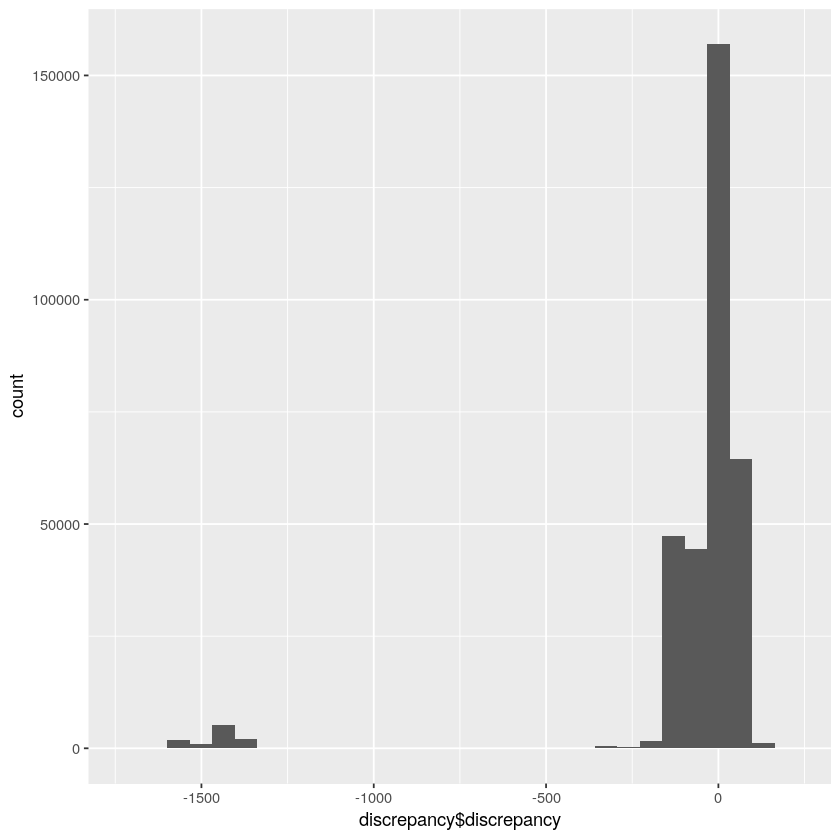

In [90]:
qplot(discrepancy$discrepancy, geom="histogram")  # shortcut ggplot function

This looks like a mixture distribution. Any ideas what could be the cause?

In [91]:
filter(my_flights_total, total_time < -1000) %>% select(dep_time, arr_time) %>% print

# A tibble: 10,621 x 2
   dep_time arr_time
      <int>    <int>
 1     1929        3
 2     1939       29
 3     2058        8
 4     2102      146
 5     2108       25
 6     2120       16
 7     2121        6
 8     2128       26
 9     2134       20
10     2136       25
# ... with 10,611 more rows


We can fix the negative values by adding 24\*60 to them (we keep the positive values as is).

Note that `transmute()` will only keep the new variables.

In [92]:
transmute(my_flights_total, arr_time, dep_time,
          new_total_time = ifelse(
              total_time < 0, 
              (total_time + 24*60), + 
               total_time)
          ) %>% print

# A tibble: 336,776 x 3
   arr_time dep_time new_total_time
      <int>    <int>          <dbl>
 1      830      517          193  
 2      850      533          197  
 3      923      542          221  
 4     1004      544          260  
 5      812      554          138  
 6      740      554          106  
 7      913      555          198  
 8      709      557           72.0
 9      838      557          161  
10      753      558          115  
# ... with 336,766 more rows


Note the use of the `ifelse()` function here. It takes three arguments: a logical (`TRUE`/`FALSE`), plus two other vectors, all having the same length:
```{r}
ifelse(v1, v2, v3)
```
It returns a new vector, also of the same length. Any entry for which `v1==TRUE`, it contains the corresponding entry from `v2`. Otherwise, the entry comes from `v3`.

In [93]:
ifelse(c(TRUE, TRUE, FALSE, TRUE), 
       c("v1 1", "v1 2", "v1 3", "v1 4"),
       c("v2 1", "v2 2", "v2 3", "v2 4"))

[1] "v1 1" "v1 2" "v2 3" "v1 4"

A nice feature of `mutate()`/`transmute()` is that you can use columns defined earlier in the command:

In [94]:
print(mutate(flights, gain = arr_delay - dep_delay, gain_per_hour = gain / (air_time / 60)))

# A tibble: 336,776 x 21
    year month   day dep_t… sched… dep_d… arr_… sched… arr_d… carr… flig… tail…
   <int> <int> <int>  <int>  <int>  <dbl> <int>  <int>  <dbl> <chr> <int> <chr>
 1  2013     1     1    517    515   2.00   830    819  11.0  UA     1545 N142…
 2  2013     1     1    533    529   4.00   850    830  20.0  UA     1714 N242…
 3  2013     1     1    542    540   2.00   923    850  33.0  AA     1141 N619…
 4  2013     1     1    544    545  -1.00  1004   1022 -18.0  B6      725 N804…
 5  2013     1     1    554    600  -6.00   812    837 -25.0  DL      461 N668…
 6  2013     1     1    554    558  -4.00   740    728  12.0  UA     1696 N394…
 7  2013     1     1    555    600  -5.00   913    854  19.0  B6      507 N516…
 8  2013     1     1    557    600  -3.00   709    723 -14.0  EV     5708 N829…
 9  2013     1     1    557    600  -3.00   838    846 - 8.00 B6       79 N593…
10  2013     1     1    558    600  -2.00   753    745   8.00 AA      301 N3AL…
# ... with 336,

## Grouped Summaries
`summarize()` can be used to summarize entire data frames by collapsing them into single number summaries. As opposed to `mutate()`, which generates a new column and entry for each row, `summarize()` first groups columns and then applies a summary function.

The most basic use of summarize is to compute statistics over the whole data set:

In [95]:
summarize(flights, delay = mean(dep_delay, na.rm = TRUE))
# Equivalently:
mean(flights$dep_delay, na.rm=TRUE)

delay
12.63907


[1] 12.63907

Here we used the `na.rm=TRUE` option to tell R to ignore entries with missing `dep_delay` when calculating the mean. If we did not do this we would get `NA`s:

In [96]:
summarize(flights, delay = mean(dep_delay, na.rm = FALSE))  # the default

delay
NA


`na.rm=TRUE` is equivalent to dropping the missing entries and then calculating the mean:

In [97]:
filter(flights, !is.na(dep_delay)) %>% summarize(delay=mean(dep_delay))

delay
12.63907


### Grouping observations
`summarize()` is most useful when combined with `group_by()` to group observations before calculating the summary statistic. The `group_by` function tells R how your data are grouped:

In [98]:
print(by_month <- group_by(flights, year, month))  # must use <- here :)

# A tibble: 336,776 x 19
# Groups:   year, month [12]
    year month   day dep_t… sched… dep_d… arr_… sched… arr_d… carr… flig… tail…
   <int> <int> <int>  <int>  <int>  <dbl> <int>  <int>  <dbl> <chr> <int> <chr>
 1  2013     1     1    517    515   2.00   830    819  11.0  UA     1545 N142…
 2  2013     1     1    533    529   4.00   850    830  20.0  UA     1714 N242…
 3  2013     1     1    542    540   2.00   923    850  33.0  AA     1141 N619…
 4  2013     1     1    544    545  -1.00  1004   1022 -18.0  B6      725 N804…
 5  2013     1     1    554    600  -6.00   812    837 -25.0  DL      461 N668…
 6  2013     1     1    554    558  -4.00   740    728  12.0  UA     1696 N394…
 7  2013     1     1    555    600  -5.00   913    854  19.0  B6      507 N516…
 8  2013     1     1    557    600  -3.00   709    723 -14.0  EV     5708 N829…
 9  2013     1     1    557    600  -3.00   838    846 - 8.00 B6       79 N593…
10  2013     1     1    558    600  -2.00   753    745   8.00 AA  

In [99]:
summarize(by_month, mean(dep_delay, na.rm=T)) %>% print

# A tibble: 12 x 3
# Groups:   year [?]
    year month `mean(dep_delay, na.rm = T)`
   <int> <int>                        <dbl>
 1  2013     1                        10.0 
 2  2013     2                        10.8 
 3  2013     3                        13.2 
 4  2013     4                        13.9 
 5  2013     5                        13.0 
 6  2013     6                        20.8 
 7  2013     7                        21.7 
 8  2013     8                        12.6 
 9  2013     9                         6.72
10  2013    10                         6.24
11  2013    11                         5.44
12  2013    12                        16.6 


Many summary functions are available:

* Center: `mean(), median()`
* Spread: `sd(), IQR(), mad()`
* Range: `min(), max(), quantile()`
* Position: `first(), last(), nth()`
* Count: `n(), n_distinct()`
* Logical: `any(), all()`

### Examples
Compute the number of flights each month:

In [100]:
group_by(flights, month) %>% summarize(n())

month,n()
1,27004
2,24951
3,28834
4,28330
5,28796
6,28243
7,29425
8,29327
9,27574
10,28889


### Always include counts
This operation is so common that we have a special shortcut for it:

In [101]:
group_by(flights, month) %>% count

month,n
1,27004
2,24951
3,28834
4,28330
5,28796
6,28243
7,29425
8,29327
9,27574
10,28889


One of the reasons for the `count()` shortcut is that it is always a good idea to add counts when do you a summary. This is because some groups may have very low numbers of observations, resulting in high variance for the summary statistics. For example, let's look at particular airplanes which have high delays, perhaps due to maintenance, etc:

In [102]:
not_cancelled = flights %>% filter(!is.na(dep_delay), !is.na(arr_delay))
not_cancelled %>% group_by(tailnum) %>% summarise(delay = mean(arr_delay)) %>% 
                  top_n(5)

Selecting by delay


tailnum,delay
N587NW,264
N844MH,320
N851NW,219
N911DA,294
N922EV,276


The top five most delayed planes experience an average delay of 4-5 hours! Clearly this is not realistic. The issue is that there are very few observations for each of these planes:

In [103]:
delays = not_cancelled %>% group_by(tailnum) %>% summarise(delay=mean(arr_delay), obs=n())
top_n(delays, 5, delay)

tailnum,delay,obs
N587NW,264,1
N844MH,320,1
N851NW,219,1
N911DA,294,1
N922EV,276,1


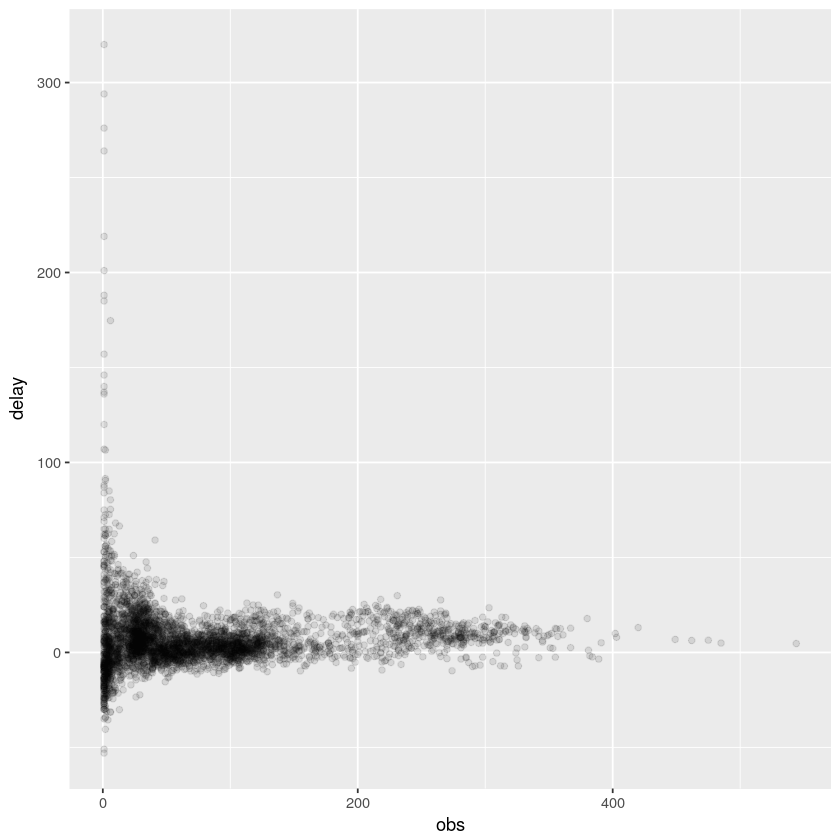

In [104]:
ggplot(delays) + geom_point(aes(x=obs, y=delay), alpha=.1) 

The solution is to filter to only those planes that had sufficiently many observations:

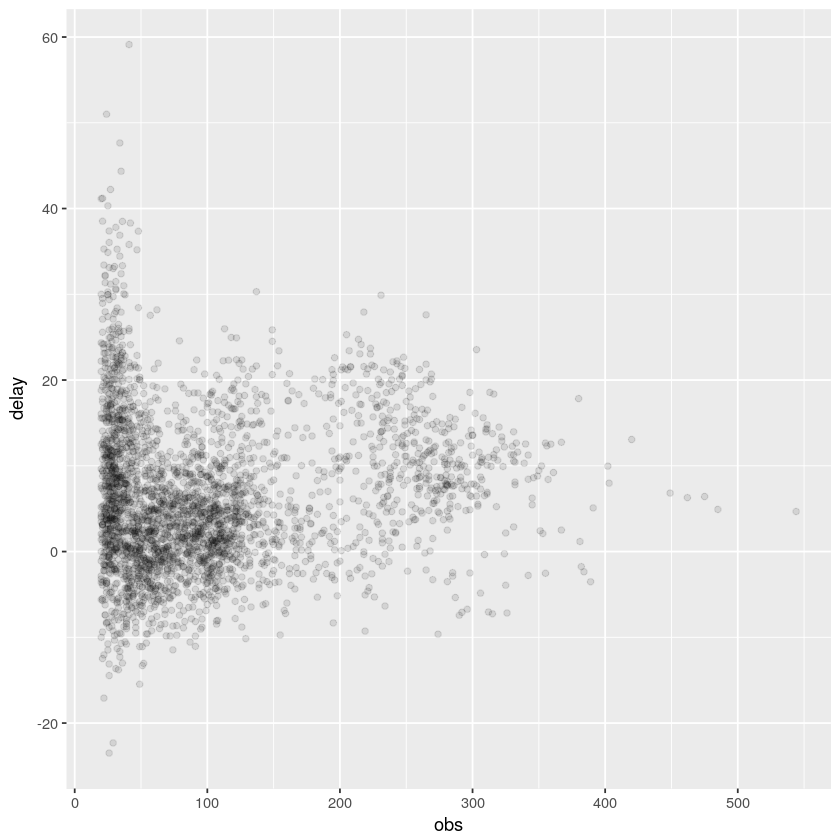

In [105]:
ggplot(filter(delays, obs >= 20)) + geom_point(aes(x=obs, y=delay), alpha=.1) 

Something similar occurs if we start sorting by an average: ignoring the standard error of the estimated average can cause spurious extreme values to rise to the top. Here's an example from baseball:

`geom_smooth()` using method = 'gam'


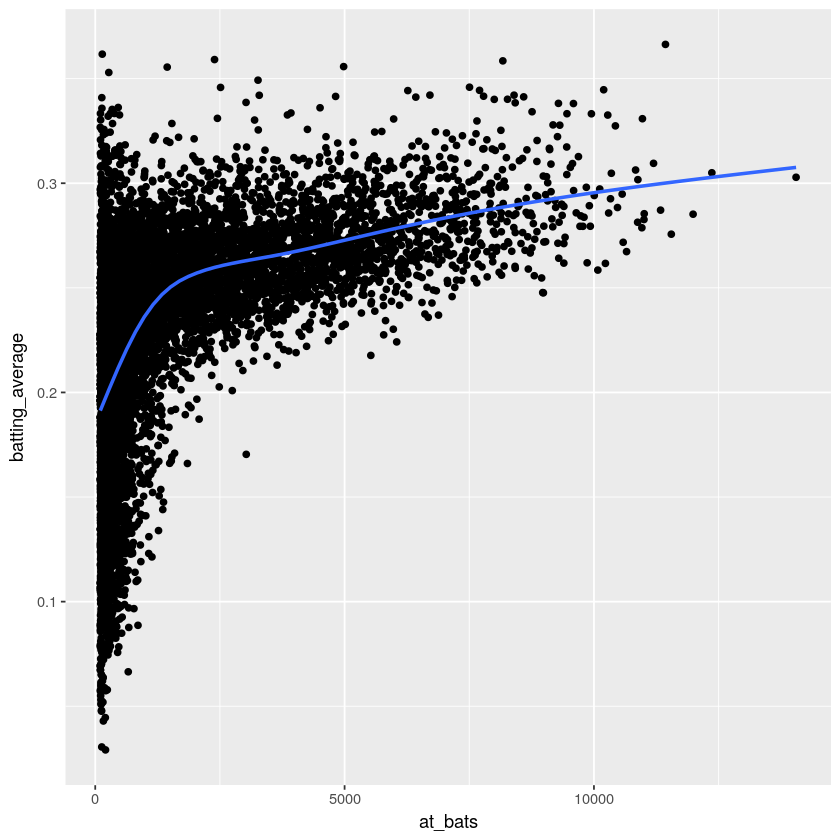

In [106]:
# Convert to a tibble so it prints nicely
# H = hits; AB = at bats
# ba =
batters <- as_tibble(Lahman::Batting) %>% group_by(playerID) %>% summarise(
    batting_average = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    at_bats = sum(AB, na.rm = TRUE) )
batters %>% filter(at_bats > 100) %>%
            ggplot(mapping = aes(x = at_bats, y = batting_average)) + 
                  geom_point() + geom_smooth(se = FALSE)

Clearly better players get more at-bats. Who are the best players? If we sort by batting average, we see:

In [107]:
batters %>% arrange(desc(batting_average)) %>% print

# A tibble: 18,915 x 3
   playerID  batting_average at_bats
   <chr>               <dbl>   <int>
 1 abramge01            1.00       1
 2 banisje01            1.00       1
 3 bartocl01            1.00       1
 4 bassdo01             1.00       1
 5 berrijo01            1.00       1
 6 birasst01            1.00       2
 7 bruneju01            1.00       1
 8 burnscb01            1.00       1
 9 cammaer01            1.00       1
10 campsh01             1.00       1
# ... with 18,905 more rows


To get a better estimate we should restrict to people who had at least 100 at-bats, say:

In [108]:
batters %>% arrange(desc(batting_average)) %>% filter(at_bats >= 1000) %>% print

# A tibble: 3,693 x 3
   playerID  batting_average at_bats
   <chr>               <dbl>   <int>
 1 cobbty01            0.366   11434
 2 barnero01           0.359    2392
 3 hornsro01           0.358    8173
 4 jacksjo01           0.356    4981
 5 meyerle01           0.356    1443
 6 odoulle01           0.349    3264
 7 delahed01           0.346    7505
 8 mcveyca01           0.346    2513
 9 speaktr01           0.345   10195
10 willite01           0.344    7706
# ... with 3,683 more rows


In [109]:
Lahman::playerInfo("cobbty01")

,playerID,nameFirst,nameLast
3183,cobbty01,Ty,Cobb


### Some other examples of aggregation
Compute the number of unique destinations for each day of the month:

In [110]:
group_by(flights, day) %>% summarize(n_distinct(dest)) %>% print

# A tibble: 31 x 2
     day `n_distinct(dest)`
   <int>              <int>
 1     1                 96
 2     2                101
 3     3                 97
 4     4                 96
 5     5                100
 6     6                 99
 7     7                 96
 8     8                 95
 9     9                101
10    10                 97
# ... with 21 more rows


Dispersion of departure delays by carrier:

In [111]:
group_by(flights, carrier) %>% summarize(n=n(),
                                         dep_iqr=IQR(dep_delay, na.rm=T), 
                                         arr_iqr=IQR(arr_delay, na.rm=T)) %>% arrange(n)

carrier,n,dep_iqr,arr_iqr
OO,32,13,22.00
HA,342,6,30.50
YV,601,30,40.25
F9,685,22,40.00
AS,714,10,34.00
FL,3260,21,31.00
VX,5162,12,31.00
WN,12275,19,30.00
9E,18460,23,36.00
US,20536,7,23.00


What is the worst-performing air carrier (in terms of departure delay) for each month of the year?

In [112]:
most_delayed = group_by(flights, carrier, month) %>% 
                   summarize(mean_dep_delay=mean(dep_delay, na.rm=T), obs=n()) %>%
                   group_by(month) %>% mutate(rank=min_rank(-mean_dep_delay)) %>%
                   arrange(month, rank) %>% filter(rank==1) %>% print

# A tibble: 12 x 5
# Groups:   month [12]
   carrier month mean_dep_delay   obs  rank
   <chr>   <int>          <dbl> <int> <int>
 1 OO          1           67.0     1     1
 2 F9          2           29.8    49     1
 3 YV          3           31.9    18     1
 4 YV          4           27.1    38     1
 5 F9          5           35.9    58     1
 6 OO          6           61.0     2     1
 7 FL          7           41.2   263     1
 8 OO          8           64.0     4     1
 9 FL          9           16.9   255     1
10 YV         10           20.0    66     1
11 FL         11           16.9   202     1
12 EV         12           27.9  4307     1


Again note the issue here with low observation counts. In case you are curious what these carrier codes represent (who not to fly), we can use a *table join* (to be discussed later) to figure it out:

In [113]:
most_delayed %>% left_join(airlines)

Joining, by = "carrier"


carrier,month,mean_dep_delay,obs,rank,name
OO,1,67.00000,1,1,SkyWest Airlines Inc.
F9,2,29.77083,49,1,Frontier Airlines Inc.
YV,3,31.88889,18,1,Mesa Airlines Inc.
YV,4,27.11111,38,1,Mesa Airlines Inc.
F9,5,35.94828,58,1,Frontier Airlines Inc.
OO,6,61.00000,2,1,SkyWest Airlines Inc.
FL,7,41.16270,263,1,AirTran Airways Corporation
OO,8,64.00000,4,1,SkyWest Airlines Inc.
FL,9,16.94882,255,1,AirTran Airways Corporation
YV,10,20.00000,66,1,Mesa Airlines Inc.


How does the situation change if we look at the median departure delay?

In [114]:
group_by(flights, carrier, month) %>% 
    summarize(median_dep_delay=median(dep_delay, na.rm=T), obs=n()) %>%
    group_by(month) %>% mutate(rank=min_rank(-median_dep_delay)) %>%
    arrange(month, rank) %>% filter(rank==1) %>% print

# A tibble: 12 x 5
# Groups:   month [12]
   carrier month median_dep_delay   obs  rank
   <chr>   <int>            <dbl> <int> <int>
 1 OO          1            67.0      1     1
 2 EV          2             1.00  3827     1
 3 YV          3            15.5     18     1
 4 YV          4             9.00    38     1
 5 F9          5            13.5     58     1
 6 OO          6            61.0      2     1
 7 F9          7            16.0     58     1
 8 OO          8            56.0      4     1
 9 F9          9             2.00    58     1
10 FL         10             3.00   236     1
11 FL         11             6.00   202     1
12 WN         12             9.00  1099     1


Compared to the mean, the median departure delay looks less extreme.

### Transformations in summaries
We can combine transformations and summaries to get perform more complicated queries on the data. The following summary looks at the number of early-morning departures by month:

In [115]:
not_cancelled %>% group_by(month) %>% summarise(n_early = sum(dep_time < 500)) %>% print

# A tibble: 12 x 2
   month n_early
   <int>   <int>
 1     1      75
 2     2      84
 3     3     147
 4     4     148
 5     5     120
 6     6     219
 7     7     268
 8     8     135
 9     9      64
10    10      43
11    11      46
12    12     127


A red-eye (overnight) flight will have `dep_time > arr_time`. Here are the red-eyes by month:

In [116]:
not_cancelled %>% group_by(month) %>% summarise(n_redeye = sum(dep_time > arr_time)) %>% print

# A tibble: 12 x 2
   month n_redeye
   <int>    <int>
 1     1      713
 2     2      631
 3     3      949
 4     4     1019
 5     5      795
 6     6     1241
 7     7     1439
 8     8      933
 9     9      489
10    10      507
11    11      657
12    12     1163
